In [1]:
###model test

In [38]:
##new model

### import required libraries and pkgs ###
import glob
import os
import librosa
import numpy as np
#from sklearn.model_selection import KFold
#from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd




### Define feature extraction ### defualt=1024 in MATLAB
#MytimeWindow=1024
MySampleRate=44100

In [39]:
def Myextract_features(filePath, sampleRate=44100):
    
    signal,sr = librosa.load(filePath, sampleRate)

    #centroid = librosa.feature.spectral_centroid(y=signal,sr=sr)
    mfcc = librosa.feature.mfcc(y=signal, sr=sr)
    #features = librosa.feature.melspectrogram(y=signal,sr=sr, n_mels=1)
    mel = librosa.feature.melspectrogram(y=signal, sr=sr)

    features = np.concatenate((mel,mfcc),axis=0)

    return features

In [40]:
import pandas as pd

filenames = pd.read_csv('/Users/pooyan/Documents/CMMS/normal.csv')
#convert filenames from dataframe to array
filenames = np.array(filenames['name'].values)
#read all noraml files
parent_dir = '/Users/pooyan/Desktop/data_cmms/skytraina_06252019/turbo/'
sub_dir = 'combine/'
file_ext='*.ogg'
#all_Normalfiles = glob.glob(os.path.join(parent_dir, sub_dir, file_ext))[0:2500]
all_Normalfiles = parent_dir +sub_dir+ filenames


all_noraml_features = [] #define an empty array
all_noraml_labels = []
for i in range(0,len(all_Normalfiles)):
    my_features = Myextract_features(all_Normalfiles[i])
    all_noraml_features.append(my_features)
    all_noraml_labels.append("normal")

#use reshape to conver outputs into arrays
dim_1 = len(all_Normalfiles)
dim_2 = my_features.shape[0] #number of features
dim_3 = my_features.shape[1]
all_noraml_features = np.asarray(all_noraml_features).reshape(dim_1, dim_2, dim_3)
all_noraml_labels = np.asarray(all_noraml_labels).reshape(dim_1)

#check the dimentions
print(all_noraml_features.shape)
print(all_noraml_labels.shape)

#read all anoamly files
filenames = pd.read_csv('/Users/pooyan/Documents/CMMS/anomaly.csv')
#convert filenames from dataframe to array
filenames = np.array(filenames['name'].values)

parent_dir = '/Users/pooyan/Desktop/data_cmms/skytraina_06252019/turbo/'
sub_dir = 'combine/'
file_ext='*.ogg'
#all_Anomalyfiles = glob.glob(os.path.join(parent_dir, sub_dir, file_ext))[0:1000]
#all_Anomalyfiles = parent_dir +sub_dir+ filenames

all_anomaly_features = [] #define an empty array
all_anomaly_labels = []
for i in range(0,len(all_Anomalyfiles)):
    my_features = Myextract_features(all_Anomalyfiles[i])
    all_anomaly_features.append(my_features)
    all_anomaly_labels.append("anomaly")

#use reshape to conver outputs into arrays
dim_1 = len(all_Anomalyfiles)
dim_2 = my_features.shape[0] #number of features
dim_3 = my_features.shape[1]
all_anomaly_features = np.asarray(all_anomaly_features).reshape(dim_1, dim_2, dim_3)
all_anomaly_labels = np.asarray(all_anomaly_labels).reshape(dim_1)

#check the dimentions
print(all_anomaly_features.shape)
print(all_anomaly_labels.shape)

#Merge noraml and anomaly arrays
all_data = np.concatenate((all_noraml_features,all_anomaly_features),axis=0)
all_label = np.concatenate((all_noraml_labels,all_anomaly_labels),axis=0)

#check the dimentions
print(all_data.shape)

(8633, 148, 259)
(8633,)
(1000, 148, 259)
(1000,)
(9633, 148, 259)


In [41]:
#endocding labels
my_ec = LabelEncoder()
all_label = my_ec.fit_transform(all_label)

my_ec.transform(["normal"])
my_ec.inverse_transform(all_label)

#split data into train. validation, and test
X_train, X_test, y_train, y_test = train_test_split(all_data,all_label,test_size=0.1,shuffle=True)
X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train,test_size=0.1,shuffle=True)

#check the dimentions
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

#check the dimentions
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(7802, 148, 259)
(964, 148, 259)
(867, 148, 259)
(7802, 148, 259)
(964, 148, 259)
(867, 148, 259)


In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
#from tensorflow.keras.utils import to_categorical
from keras import optimizers
model = Sequential()
model.add(LSTM(50, input_shape=(148,259)))
model.add(Dropout(0.1)) #recommnedded rate is 0.1
#model.add(Dense(1, activation="sigmoid"))
model.add(Dense(2, activation = "softmax"))
#model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(), metrics=["accuracy"])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 50)                62000     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 2)                 102       
                                                                 
Total params: 62,102
Trainable params: 62,102
Non-trainable params: 0
_________________________________________________________________


In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.layers import LSTM

model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 30, batch_size = 128, verbose = 1)


Epoch 1/30
9/9 [==============================] - 3s 120ms/step - loss: 0.6575 - accuracy: 0.6693 - val_loss: 0.6440 - val_accuracy: 0.6349
Epoch 2/30
9/9 [==============================] - 1s 78ms/step - loss: 0.6337 - accuracy: 0.6781 - val_loss: 0.6427 - val_accuracy: 0.6508
Epoch 3/30
9/9 [==============================] - 1s 74ms/step - loss: 0.6305 - accuracy: 0.6746 - val_loss: 0.6441 - val_accuracy: 0.6746
Epoch 4/30
9/9 [==============================] - 1s 75ms/step - loss: 0.6193 - accuracy: 0.6887 - val_loss: 0.6470 - val_accuracy: 0.6746
Epoch 5/30
9/9 [==============================] - 1s 76ms/step - loss: 0.6129 - accuracy: 0.7011 - val_loss: 0.6497 - val_accuracy: 0.6825
Epoch 6/30
9/9 [==============================] - 1s 75ms/step - loss: 0.6089 - accuracy: 0.6922 - val_loss: 0.6547 - val_accuracy: 0.6746
Epoch 7/30
9/9 [==============================] - 1s 75ms/step - loss: 0.6023 - accuracy: 0.6958 - val_loss: 0.6587 - val_accuracy: 0.6746
Epoch 8/30
9/9 [==========

In [17]:
input_shape = (148,259)
model = tf.keras.Sequential()
model.add(LSTM(50, input_shape=(148,259)))
#model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(2,activation = 'softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                62000     
                                                                 
 dense_3 (Dense)             (None, 64)                3264      
                                                                 
 dense_4 (Dense)             (None, 2)                 130       
                                                                 
Total params: 65,394
Trainable params: 65,394
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 30, batch_size = 128, verbose = 1)


Epoch 1/30
9/9 [==============================] - 2s 115ms/step - loss: 0.6959 - accuracy: 0.5564 - val_loss: 0.6767 - val_accuracy: 0.5714
Epoch 2/30
9/9 [==============================] - 1s 74ms/step - loss: 0.6348 - accuracy: 0.6684 - val_loss: 0.6520 - val_accuracy: 0.6429
Epoch 3/30
9/9 [==============================] - 1s 74ms/step - loss: 0.6128 - accuracy: 0.6958 - val_loss: 0.6514 - val_accuracy: 0.6587
Epoch 4/30
9/9 [==============================] - 1s 74ms/step - loss: 0.6042 - accuracy: 0.7072 - val_loss: 0.6543 - val_accuracy: 0.6587
Epoch 5/30
9/9 [==============================] - 1s 76ms/step - loss: 0.5976 - accuracy: 0.7125 - val_loss: 0.6557 - val_accuracy: 0.6667
Epoch 6/30
9/9 [==============================] - 1s 74ms/step - loss: 0.5920 - accuracy: 0.7125 - val_loss: 0.6578 - val_accuracy: 0.6667
Epoch 7/30
9/9 [==============================] - 1s 74ms/step - loss: 0.5871 - accuracy: 0.7143 - val_loss: 0.6594 - val_accuracy: 0.6587
Epoch 8/30
9/9 [==========

In [23]:
from keras import layers as keras_layers
import numpy as np    
from keras.layers.convolutional import Conv1D    
from keras.layers.convolutional import MaxPooling1D 
from keras.layers import Flatten, RepeatVector, Bidirectional

model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(148,259)))
#model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
#model.add(LSTM(units=25, return_sequences=True, activation='relu'))
#model.add(Dropout(0.2))
#model.add(LSTM(units=25, return_sequences=True, activation='relu'))
#model.add(Dropout(0.2))
#model.add(LSTM(units=25, return_sequences=True, activation='relu'))
model.add(LSTM(units=50, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(50, activation='relu'))
model.add(Dense(2))
#model.compile(loss='mae', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 147, 256)          132864    
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 73, 256)          0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 18688)             0         
                                                                 
 repeat_vector_1 (RepeatVect  (None, 30, 18688)        0         
 or)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 30, 50)            3747800   
                                                                 
 bidirectional (Bidirectiona  (None, 256)            

In [24]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 30, batch_size = 128, verbose = 1)


Epoch 1/30
9/9 [==============================] - 10s 787ms/step - loss: 2.9666 - accuracy: 0.6781 - val_loss: 4.0123 - val_accuracy: 0.6667
Epoch 2/30
9/9 [==============================] - 7s 734ms/step - loss: 2.7815 - accuracy: 0.6799 - val_loss: 2.5157 - val_accuracy: 0.6746
Epoch 3/30
9/9 [==============================] - 7s 737ms/step - loss: 2.6904 - accuracy: 0.6781 - val_loss: 2.6602 - val_accuracy: 0.6746
Epoch 4/30
9/9 [==============================] - 7s 724ms/step - loss: 2.7543 - accuracy: 0.6896 - val_loss: 2.6657 - val_accuracy: 0.6825
Epoch 5/30
9/9 [==============================] - 7s 726ms/step - loss: 2.9551 - accuracy: 0.6914 - val_loss: 2.5322 - val_accuracy: 0.6508
Epoch 6/30
9/9 [==============================] - 7s 742ms/step - loss: 2.8558 - accuracy: 0.6790 - val_loss: 2.8610 - val_accuracy: 0.6905
Epoch 7/30
9/9 [==============================] - 7s 733ms/step - loss: 2.7783 - accuracy: 0.6896 - val_loss: 2.8995 - val_accuracy: 0.6667
Epoch 8/30
9/9 [===

In [26]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_train)
y_pred = [0 if y[0]>y[1] else 1 for y in pred]   #thereshold=50 y[0]>0.50

cm=confusion_matrix(y_train,y_pred)
print("train set")
print("0:%s - 1:%s"%(my_ec.inverse_transform([0])[0],my_ec.inverse_transform([1])[0]))
print(cm)

accuracy = (cm[0,0]+cm[1,1])/cm.sum()
precision= (cm[0,0])/(cm[0,0]+cm[1,0])
recall = (cm[0,0])/(cm[0,0]+cm[0,1])
f1=2*precision*recall/(precision+recall)

print("accuracy=%.2f f1score=%.2f"%(accuracy, f1))
print("precision=%.2f recall=%.2f"%(precision, recall))

train set
0:anomaly - 1:normal
[[ 13 310]
 [ 44 767]]
accuracy=0.69 f1score=0.07
precision=0.23 recall=0.04


In [42]:
from keras import layers as keras_layers
import numpy as np    
from keras.layers.convolutional import Conv1D    
from keras.layers.convolutional import MaxPooling1D 

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(148,259)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 146, 64)           49792     
                                                                 
 conv1d_7 (Conv1D)           (None, 144, 64)           12352     
                                                                 
 dropout_5 (Dropout)         (None, 144, 64)           0         
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 72, 64)           0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 4608)              0         
                                                                 
 dense_10 (Dense)            (None, 100)               460900    
                                                     

In [43]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 30, batch_size = 128, verbose = 1)


Epoch 1/30
61/61 [==============================] - 4s 53ms/step - loss: 64.9138 - accuracy: 0.8238 - val_loss: 18.6187 - val_accuracy: 0.9112
Epoch 2/30
61/61 [==============================] - 3s 50ms/step - loss: 19.3958 - accuracy: 0.8386 - val_loss: 9.9191 - val_accuracy: 0.9043
Epoch 3/30
61/61 [==============================] - 3s 50ms/step - loss: 12.1556 - accuracy: 0.8445 - val_loss: 6.7233 - val_accuracy: 0.9089
Epoch 4/30
61/61 [==============================] - 3s 53ms/step - loss: 9.2541 - accuracy: 0.8540 - val_loss: 4.4451 - val_accuracy: 0.8812
Epoch 5/30
61/61 [==============================] - 3s 49ms/step - loss: 6.9335 - accuracy: 0.8476 - val_loss: 3.4443 - val_accuracy: 0.8720
Epoch 6/30
61/61 [==============================] - 3s 49ms/step - loss: 5.7872 - accuracy: 0.8507 - val_loss: 2.5881 - val_accuracy: 0.8512
Epoch 7/30
61/61 [==============================] - 3s 49ms/step - loss: 4.8195 - accuracy: 0.8509 - val_loss: 2.2293 - val_accuracy: 0.8328
Epoch 8/3

In [44]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_train)
y_pred = [0 if y[0]>y[1] else 1 for y in pred]   #thereshold=50 y[0]>0.50

cm=confusion_matrix(y_train,y_pred)
print("train set")
print("0:%s - 1:%s"%(my_ec.inverse_transform([0])[0],my_ec.inverse_transform([1])[0]))
print(cm)

accuracy = (cm[0,0]+cm[1,1])/cm.sum()
precision= (cm[0,0])/(cm[0,0]+cm[1,0])
recall = (cm[0,0])/(cm[0,0]+cm[0,1])
f1=2*precision*recall/(precision+recall)

print("accuracy=%.2f f1score=%.2f"%(accuracy, f1))
print("precision=%.2f recall=%.2f"%(precision, recall))

train set
0:anomaly - 1:normal
[[ 153  652]
 [   0 6997]]
accuracy=0.92 f1score=0.32
precision=1.00 recall=0.19


In [45]:
pred = model.predict(X_test)
y_pred = [0 if y[0]>y[1] else 1 for y in pred]

print(pred)

cm=confusion_matrix(y_test,y_pred)
print("test set")
print("0:%s - 1:%s"%(my_ec.inverse_transform([0])[0],my_ec.inverse_transform([1])[0]))
print(cm)


accuracy = (cm[0,0]+cm[1,1])/cm.sum() #tp+tn/sum
precision= (cm[0,0])/(cm[0,0]+cm[1,0]) #tp/tp+fp
recall = (cm[0,0])/(cm[0,0]+cm[0,1]) #tp/tp+fn
f1=2*precision*recall/(precision+recall)

print("accuracy=%.2f f1score=%.2f"%(accuracy, f1))


print("precision=%.2f recall=%.2f"%(precision, recall))

[[0.12484161 0.87515837]
 [0.11108045 0.8889195 ]
 [0.10468406 0.89531595]
 ...
 [0.09448382 0.9055162 ]
 [0.10150696 0.89849305]
 [0.14010492 0.85989505]]
test set
0:anomaly - 1:normal
[[ 14  89]
 [  0 861]]
accuracy=0.91 f1score=0.24
precision=1.00 recall=0.14


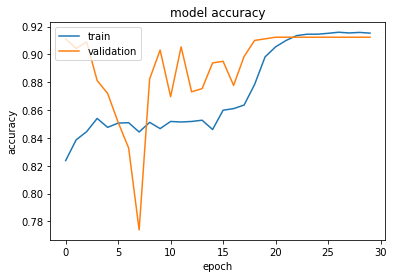

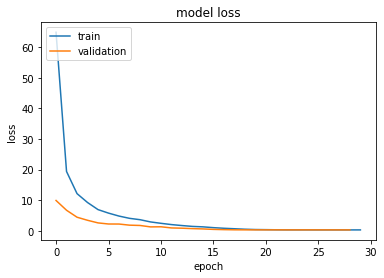

In [46]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'][1:43])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [49]:
# define Bi directional LSTM

from keras.layers import Bidirectional
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import LSTM

model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(148,259)))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (None, 148, 100)         124000    
 nal)                                                            
                                                                 
 time_distributed_2 (TimeDis  (None, 148, 2)           202       
 tributed)                                                       
                                                                 
Total params: 124,202
Trainable params: 124,202
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 30, batch_size = 128, verbose = 1)


Epoch 1/30


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
      app.start()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 612, in start
      self.io_loop.start()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 741, in _run_callback
      ret = callback()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2886, in run_cell
      result = self._run_cell(
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2932, in _run_cell
      return runner(coro)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3155, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3347, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3427, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-51-f2624ce4e97b>", line 2, in <module>
      history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 30, batch_size = 128, verbose = 1)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/losses.py", line 1862, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/backend.py", line 5202, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [18944,2] and labels shape [128]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_46806]

In [52]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(148,259)))
#model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
#model.add(LSTM(units=25, return_sequences=True, activation='relu'))
#model.add(Dropout(0.2))
#model.add(LSTM(units=25, return_sequences=True, activation='relu'))
#model.add(Dropout(0.2))
#model.add(LSTM(units=25, return_sequences=True, activation='relu'))
model.add(LSTM(units=50, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(2, activation='softmax'))
#model.add(Dense(2))
#model.compile(loss='mae', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 147, 256)          132864    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 73, 256)          0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 18688)             0         
                                                                 
 repeat_vector_2 (RepeatVect  (None, 30, 18688)        0         
 or)                                                             
                                                                 
 lstm_11 (LSTM)              (None, 30, 50)            3747800   
                                                                 
 bidirectional_4 (Bidirectio  (None, 256)            

In [53]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 30, batch_size = 128, verbose = 1)


Epoch 1/30
61/61 [==============================] - 45s 703ms/step - loss: 3.6293 - accuracy: 0.3969 - val_loss: 2.9846 - val_accuracy: 0.4498
Epoch 2/30
61/61 [==============================] - 43s 710ms/step - loss: 3.0108 - accuracy: 0.4284 - val_loss: 3.2843 - val_accuracy: 0.3714
Epoch 3/30
61/61 [==============================] - 43s 708ms/step - loss: 2.9690 - accuracy: 0.3561 - val_loss: 2.8569 - val_accuracy: 0.4060
Epoch 4/30
61/61 [==============================] - 44s 715ms/step - loss: 2.8835 - accuracy: 0.4235 - val_loss: 2.7605 - val_accuracy: 0.4648
Epoch 5/30
61/61 [==============================] - 44s 719ms/step - loss: 2.8454 - accuracy: 0.4141 - val_loss: 2.8145 - val_accuracy: 0.4187
Epoch 6/30
61/61 [==============================] - 44s 716ms/step - loss: 2.7733 - accuracy: 0.4157 - val_loss: 2.8007 - val_accuracy: 0.4014
Epoch 7/30
61/61 [==============================] - 44s 717ms/step - loss: 2.8830 - accuracy: 0.4030 - val_loss: 2.0315 - val_accuracy: 0.4475

In [54]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_train)
y_pred = [0 if y[0]>y[1] else 1 for y in pred]   #thereshold=50 y[0]>0.50

cm=confusion_matrix(y_train,y_pred)
print("train set")
print("0:%s - 1:%s"%(my_ec.inverse_transform([0])[0],my_ec.inverse_transform([1])[0]))
print(cm)

accuracy = (cm[0,0]+cm[1,1])/cm.sum()
precision= (cm[0,0])/(cm[0,0]+cm[1,0])
recall = (cm[0,0])/(cm[0,0]+cm[0,1])
f1=2*precision*recall/(precision+recall)

print("accuracy=%.2f f1score=%.2f"%(accuracy, f1))
print("precision=%.2f recall=%.2f"%(precision, recall))

train set
0:anomaly - 1:normal
[[ 448  357]
 [3633 3364]]
accuracy=0.49 f1score=0.18
precision=0.11 recall=0.56


In [60]:
model = Sequential()
model.add(Bidirectional(LSTM(10, return_sequences=True),
                             input_shape=(148,259)))
model.add(Bidirectional(LSTM(10)))
model.add(Dense(2, activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_7 (Bidirectio  (None, 148, 20)          21600     
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 20)               2480      
 nal)                                                            
                                                                 
 dense_20 (Dense)            (None, 2)                 42        
                                                                 
Total params: 24,122
Trainable params: 24,122
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 30, batch_size = 128, verbose = 1)


Epoch 1/30
61/61 [==============================] - 11s 117ms/step - loss: 0.4814 - accuracy: 0.8438 - val_loss: 0.3703 - val_accuracy: 0.8939
Epoch 2/30
61/61 [==============================] - 6s 98ms/step - loss: 0.3443 - accuracy: 0.8968 - val_loss: 0.3346 - val_accuracy: 0.8939
Epoch 3/30
61/61 [==============================] - 6s 98ms/step - loss: 0.3298 - accuracy: 0.8968 - val_loss: 0.3316 - val_accuracy: 0.8939
Epoch 4/30
61/61 [==============================] - 6s 102ms/step - loss: 0.3275 - accuracy: 0.8968 - val_loss: 0.3310 - val_accuracy: 0.8939
Epoch 5/30
61/61 [==============================] - 6s 105ms/step - loss: 0.3262 - accuracy: 0.8968 - val_loss: 0.3302 - val_accuracy: 0.8939
Epoch 6/30
61/61 [==============================] - 6s 101ms/step - loss: 0.3251 - accuracy: 0.8968 - val_loss: 0.3297 - val_accuracy: 0.8939
Epoch 7/30
61/61 [==============================] - 6s 99ms/step - loss: 0.3238 - accuracy: 0.8968 - val_loss: 0.3285 - val_accuracy: 0.8939
Epoch 8/

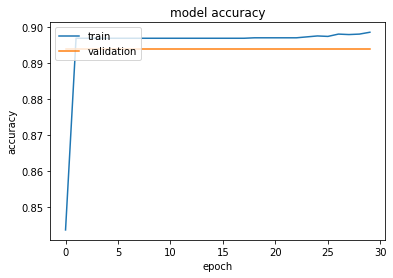

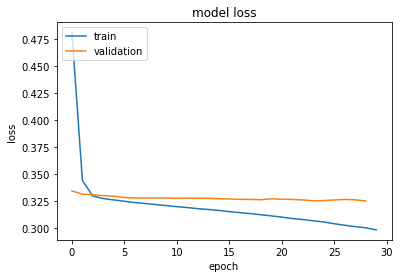

In [62]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'][1:43])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [63]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_train)
y_pred = [0 if y[0]>y[1] else 1 for y in pred]   #thereshold=50 y[0]>0.50

cm=confusion_matrix(y_train,y_pred)
print("train set")
print("0:%s - 1:%s"%(my_ec.inverse_transform([0])[0],my_ec.inverse_transform([1])[0]))
print(cm)

accuracy = (cm[0,0]+cm[1,1])/cm.sum()
precision= (cm[0,0])/(cm[0,0]+cm[1,0])
recall = (cm[0,0])/(cm[0,0]+cm[0,1])
f1=2*precision*recall/(precision+recall)

print("accuracy=%.2f f1score=%.2f"%(accuracy, f1))
print("precision=%.2f recall=%.2f"%(precision, recall))

train set
0:anomaly - 1:normal
[[  18  787]
 [   0 6997]]
accuracy=0.90 f1score=0.04
precision=1.00 recall=0.02


In [64]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(148,259)))
#model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
#model.add(LSTM(units=25, return_sequences=True, activation='relu'))
#model.add(Dropout(0.2))
#model.add(LSTM(units=25, return_sequences=True, activation='relu'))
#model.add(Dropout(0.2))
#model.add(LSTM(units=25, return_sequences=True, activation='relu'))
model.add(LSTM(units=50, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(2, activation='softmax'))
#model.add(Dense(2))
#model.compile(loss='mae', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 147, 256)          132864    
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 73, 256)          0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 18688)             0         
                                                                 
 repeat_vector_5 (RepeatVect  (None, 30, 18688)        0         
 or)                                                             
                                                                 
 lstm_18 (LSTM)              (None, 30, 50)            3747800   
                                                                 
 bidirectional_9 (Bidirectio  (None, 256)            

In [65]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 3, batch_size = 128, verbose = 1)


Epoch 1/3
61/61 [==============================] - 48s 745ms/step - loss: 1313.9136 - accuracy: 0.6774 - val_loss: 2166.0779 - val_accuracy: 0.7993
Epoch 2/3
61/61 [==============================] - 45s 735ms/step - loss: 2626.6067 - accuracy: 0.7370 - val_loss: 4492.1138 - val_accuracy: 0.6032
Epoch 3/3
61/61 [==============================] - 45s 730ms/step - loss: 1250.6357 - accuracy: 0.7462 - val_loss: 542.1602 - val_accuracy: 0.8166


In [66]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_train)
y_pred = [0 if y[0]>y[1] else 1 for y in pred]   #thereshold=50 y[0]>0.50

cm=confusion_matrix(y_train,y_pred)
print("train set")
print("0:%s - 1:%s"%(my_ec.inverse_transform([0])[0],my_ec.inverse_transform([1])[0]))
print(cm)

accuracy = (cm[0,0]+cm[1,1])/cm.sum()
precision= (cm[0,0])/(cm[0,0]+cm[1,0])
recall = (cm[0,0])/(cm[0,0]+cm[0,1])
f1=2*precision*recall/(precision+recall)

print("accuracy=%.2f f1score=%.2f"%(accuracy, f1))
print("precision=%.2f recall=%.2f"%(precision, recall))

train set
0:anomaly - 1:normal
[[ 143  662]
 [ 986 6011]]
accuracy=0.79 f1score=0.15
precision=0.13 recall=0.18


In [69]:
from keras.layers import Bidirectional, CuDNNLSTM, Attention, ELU

input_shape = (148,259)
model = tf.keras.Sequential()
model.add(LSTM(64, input_shape=(148,259)))
model.add(tf.keras.layers.LSTM(32))
#model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(2,activation = 'softmax'))
model.summary()
#model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 50)                62000     
                                                                 
 dense_22 (Dense)            (None, 64)                3264      
                                                                 
 dense_23 (Dense)            (None, 2)                 130       
                                                                 
Total params: 65,394
Trainable params: 65,394
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 50)                62000     
                                                                 
 dense_22 (Dense)         

In [70]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20
61/61 [==============================] - 6s 79ms/step - loss: 0.6119 - accuracy: 0.6355 - val_loss: 0.3543 - val_accuracy: 0.8754
Epoch 2/20
61/61 [==============================] - 5s 75ms/step - loss: 0.3424 - accuracy: 0.8816 - val_loss: 0.3406 - val_accuracy: 0.8777
Epoch 3/20
61/61 [==============================] - 5s 75ms/step - loss: 0.3354 - accuracy: 0.8881 - val_loss: 0.3393 - val_accuracy: 0.8824
Epoch 4/20
61/61 [==============================] - 5s 76ms/step - loss: 0.3301 - accuracy: 0.8930 - val_loss: 0.3374 - val_accuracy: 0.8870
Epoch 5/20
61/61 [==============================] - 5s 78ms/step - loss: 0.3258 - accuracy: 0.8950 - val_loss: 0.3370 - val_accuracy: 0.8870
Epoch 6/20
61/61 [==============================] - 5s 76ms/step - loss: 0.3217 - accuracy: 0.8958 - val_loss: 0.3372 - val_accuracy: 0.8870
Epoch 7/20
61/61 [==============================] - 5s 77ms/step - loss: 0.3179 - accuracy: 0.8966 - val_loss: 0.3372 - val_accuracy: 0.8881
Epoch 8/20
61

In [71]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_train)
y_pred = [0 if y[0]>y[1] else 1 for y in pred]   #thereshold=50 y[0]>0.50

cm=confusion_matrix(y_train,y_pred)
print("train set")
print("0:%s - 1:%s"%(my_ec.inverse_transform([0])[0],my_ec.inverse_transform([1])[0]))
print(cm)

accuracy = (cm[0,0]+cm[1,1])/cm.sum()
precision= (cm[0,0])/(cm[0,0]+cm[1,0])
recall = (cm[0,0])/(cm[0,0]+cm[0,1])
f1=2*precision*recall/(precision+recall)

print("accuracy=%.2f f1score=%.2f"%(accuracy, f1))
print("precision=%.2f recall=%.2f"%(precision, recall))

train set
0:anomaly - 1:normal
[[  82  723]
 [   2 6995]]
accuracy=0.91 f1score=0.18
precision=0.98 recall=0.10


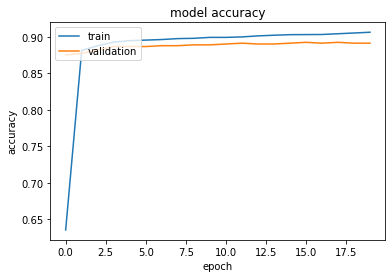

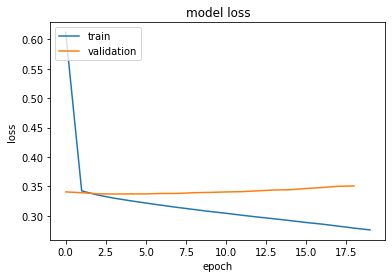

train set
0:anomaly - 1:normal
[[  82  723]
 [   2 6995]]


In [72]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'][1:43])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#plot confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error


pred = model.predict(X_train)
y_pred = [0 if y[0]>y[1] else 1 for y in pred]

cm=confusion_matrix(y_train,y_pred)
print("train set")
print("0:%s - 1:%s"%(my_ec.inverse_transform([0])[0],my_ec.inverse_transform([1])[0]))
print(cm)

In [73]:
#new features

def Myextract_features(filePath, sampleRate=44100):
    
    signal,sr = librosa.load(filePath, sampleRate)

    centroid = librosa.feature.spectral_centroid(y=signal,sr=sr)
    #mfcc = librosa.feature.mfcc(y=signal, sr=sr)
    #features = librosa.feature.melspectrogram(y=signal,sr=sr, n_mels=1)
    slope = librosa.feature.melspectrogram(y=signal, sr=sr)

    #features = np.concatenate((mel,mfcc),axis=0)
    features = np.concatenate((centroid,slope),axis=0)
    
    return features

In [74]:
import pandas as pd

filenames = pd.read_csv('/Users/pooyan/Documents/CMMS/normal.csv')
#convert filenames from dataframe to array
filenames = np.array(filenames['name'].values)
#read all noraml files
parent_dir = '/Users/pooyan/Desktop/data_cmms/skytraina_06252019/turbo/'
sub_dir = 'combine/'
file_ext='*.ogg'
#all_Normalfiles = glob.glob(os.path.join(parent_dir, sub_dir, file_ext))[0:2500]
all_Normalfiles = parent_dir +sub_dir+ filenames


all_noraml_features = [] #define an empty array
all_noraml_labels = []
for i in range(0,len(all_Normalfiles)):
    my_features = Myextract_features(all_Normalfiles[i])
    all_noraml_features.append(my_features)
    all_noraml_labels.append("normal")

#use reshape to conver outputs into arrays
dim_1 = len(all_Normalfiles)
dim_2 = my_features.shape[0] #number of features
dim_3 = my_features.shape[1]
all_noraml_features = np.asarray(all_noraml_features).reshape(dim_1, dim_2, dim_3)
all_noraml_labels = np.asarray(all_noraml_labels).reshape(dim_1)

#check the dimentions
print(all_noraml_features.shape)
print(all_noraml_labels.shape)

#read all anoamly files
filenames = pd.read_csv('/Users/pooyan/Documents/CMMS/anomaly.csv')
#convert filenames from dataframe to array
filenames = np.array(filenames['name'].values)

parent_dir = '/Users/pooyan/Desktop/data_cmms/skytraina_06252019/turbo/'
sub_dir = 'combine/'
file_ext='*.ogg'
#all_Anomalyfiles = glob.glob(os.path.join(parent_dir, sub_dir, file_ext))[0:1000]
#all_Anomalyfiles = parent_dir +sub_dir+ filenames

all_anomaly_features = [] #define an empty array
all_anomaly_labels = []
for i in range(0,len(all_Anomalyfiles)):
    my_features = Myextract_features(all_Anomalyfiles[i])
    all_anomaly_features.append(my_features)
    all_anomaly_labels.append("anomaly")

#use reshape to conver outputs into arrays
dim_1 = len(all_Anomalyfiles)
dim_2 = my_features.shape[0] #number of features
dim_3 = my_features.shape[1]
all_anomaly_features = np.asarray(all_anomaly_features).reshape(dim_1, dim_2, dim_3)
all_anomaly_labels = np.asarray(all_anomaly_labels).reshape(dim_1)

#check the dimentions
print(all_anomaly_features.shape)
print(all_anomaly_labels.shape)

#Merge noraml and anomaly arrays
all_data = np.concatenate((all_noraml_features,all_anomaly_features),axis=0)
all_label = np.concatenate((all_noraml_labels,all_anomaly_labels),axis=0)

#check the dimentions
print(all_data.shape)

(8633, 129, 259)
(8633,)
(1000, 129, 259)
(1000,)
(9633, 129, 259)


In [75]:
#endocding labels
my_ec = LabelEncoder()
all_label = my_ec.fit_transform(all_label)

my_ec.transform(["normal"])
my_ec.inverse_transform(all_label)

#split data into train. validation, and test
X_train, X_test, y_train, y_test = train_test_split(all_data,all_label,test_size=0.2,shuffle=True)
X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train,test_size=0.2,shuffle=True)

#check the dimentions
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

#check the dimentions
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(6164, 129, 259)
(1927, 129, 259)
(1542, 129, 259)
(6164, 129, 259)
(1927, 129, 259)
(1542, 129, 259)


In [78]:
from keras.layers import Bidirectional, CuDNNLSTM, Attention, ELU

#input_shape = (148,259)
model = tf.keras.Sequential()
model.add(LSTM(50, input_shape=(129,259)))
#model.add(tf.keras.layers.LSTM(32))
#model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(2,activation = 'softmax'))
model.summary()
#model.summary()

ValueError: Input 0 of layer "lstm_26" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 50)

In [79]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(129,259)))
#model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
#model.add(LSTM(units=25, return_sequences=True, activation='relu'))
#model.add(Dropout(0.2))
#model.add(LSTM(units=25, return_sequences=True, activation='relu'))
#model.add(Dropout(0.2))
#model.add(LSTM(units=25, return_sequences=True, activation='relu'))
model.add(LSTM(units=50, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(2, activation='softmax'))
#model.add(Dense(2))
#model.compile(loss='mae', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 128, 256)          132864    
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 64, 256)          0         
 1D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 16384)             0         
                                                                 
 repeat_vector_6 (RepeatVect  (None, 30, 16384)        0         
 or)                                                             
                                                                 
 lstm_27 (LSTM)              (None, 30, 50)            3287000   
                                                                 
 bidirectional_11 (Bidirecti  (None, 256)            

In [80]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20
49/49 [==============================] - 37s 695ms/step - loss: 5693.4917 - accuracy: 0.5501 - val_loss: 4507.0073 - val_accuracy: 0.6946
Epoch 2/20
49/49 [==============================] - 34s 692ms/step - loss: 5459.0527 - accuracy: 0.7383 - val_loss: 5345.2354 - val_accuracy: 0.7711
Epoch 3/20
49/49 [==============================] - 33s 683ms/step - loss: 4748.0161 - accuracy: 0.7803 - val_loss: 5397.6343 - val_accuracy: 0.7763
Epoch 4/20
49/49 [==============================] - 34s 697ms/step - loss: 4600.1855 - accuracy: 0.8058 - val_loss: 4356.8125 - val_accuracy: 0.8022
Epoch 5/20
49/49 [==============================] - 34s 687ms/step - loss: 4260.6113 - accuracy: 0.8029 - val_loss: 4005.7256 - val_accuracy: 0.7970
Epoch 6/20
49/49 [==============================] - 34s 691ms/step - loss: 3949.9951 - accuracy: 0.8284 - val_loss: 3815.9858 - val_accuracy: 0.8307
Epoch 7/20
49/49 [==============================] - 34s 698ms/step - loss: 3387.5854 - accuracy: 0.8409 - 

In [81]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_train)
y_pred = [0 if y[0]>y[1] else 1 for y in pred]   #thereshold=50 y[0]>0.50

cm=confusion_matrix(y_train,y_pred)
print("train set")
print("0:%s - 1:%s"%(my_ec.inverse_transform([0])[0],my_ec.inverse_transform([1])[0]))
print(cm)

accuracy = (cm[0,0]+cm[1,1])/cm.sum()
precision= (cm[0,0])/(cm[0,0]+cm[1,0])
recall = (cm[0,0])/(cm[0,0]+cm[0,1])
f1=2*precision*recall/(precision+recall)

print("accuracy=%.2f f1score=%.2f"%(accuracy, f1))
print("precision=%.2f recall=%.2f"%(precision, recall))

train set
0:anomaly - 1:normal
[[  62  556]
 [ 609 4937]]
accuracy=0.81 f1score=0.10
precision=0.09 recall=0.10


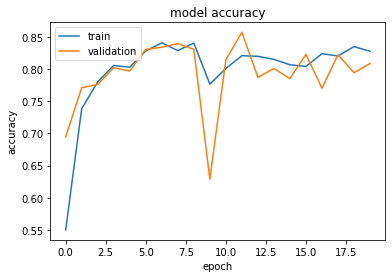

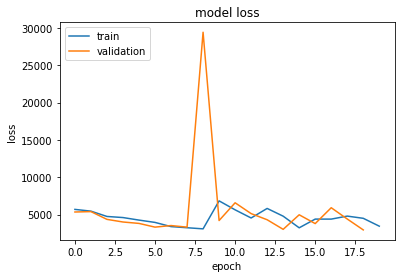

train set
0:anomaly - 1:normal
[[  62  556]
 [ 609 4937]]


In [82]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'][1:43])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#plot confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error


pred = model.predict(X_train)
y_pred = [0 if y[0]>y[1] else 1 for y in pred]

cm=confusion_matrix(y_train,y_pred)
print("train set")
print("0:%s - 1:%s"%(my_ec.inverse_transform([0])[0],my_ec.inverse_transform([1])[0]))
print(cm)

In [88]:

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=7, padding="same", strides=1, activation='relu', 
input_shape=(129, 259)))
model.add(Conv1D(filters=16, kernel_size=7, padding="same", strides=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2)) 
model.add(Flatten())
model.add(RepeatVector(5))
model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(0.5))
model.add(TimeDistributed(Dense(5, activation='relu')))
model.add(Flatten())
model.add(Dense(25,activation='relu'))
model.add(tf.keras.layers.Reshape((5,5)))
model.add(tf.keras.layers.UpSampling1D(size=3))
model.add(TimeDistributed(Dense(15, activation='relu')))

model.add(tf.keras.layers.Conv1DTranspose(filters=8, kernel_size=7, padding="same", strides=1, 
 activation="relu"))
model.add(tf.keras.layers.Conv1DTranspose(filters=16, kernel_size=7, padding="same", strides=1, 
activation="relu"))
model.add(tf.keras.layers.Conv1DTranspose(filters=32, kernel_size=7, padding="same", strides=1, 
activation="relu"))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense( 2)))

In [89]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_25 (Conv1D)          (None, 129, 32)           58048     
                                                                 
 conv1d_26 (Conv1D)          (None, 129, 16)           3600      
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 64, 16)           0         
 g1D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 1024)              0         
                                                                 
 repeat_vector_12 (RepeatVec  (None, 5, 1024)          0         
 tor)                                                            
                                                                 
 lstm_34 (LSTM)              (None, 5, 32)           

In [90]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
      app.start()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 612, in start
      self.io_loop.start()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 741, in _run_callback
      ret = callback()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2886, in run_cell
      result = self._run_cell(
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2932, in _run_cell
      return runner(coro)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3155, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3347, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3427, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-90-f86132fb0aba>", line 2, in <module>
      history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/losses.py", line 1862, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/backend.py", line 5202, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [1920,2] and labels shape [128]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_135991]

In [94]:
input_shape=(129,259,3)
CNNmodel = Sequential()
CNNmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Flatten())
CNNmodel.add(layers.Dense(32, activation='relu'))
CNNmodel.add(layers.Dense(2, activation='softmax'))
CNNmodel.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 127, 257, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 128, 32)      0         
 2D)                                                             
                                                                 
 flatten_21 (Flatten)        (None, 258048)            0         
                                                                 
 dense_42 (Dense)            (None, 32)                8257568   
                                                                 
 dense_43 (Dense)            (None, 2)                 66        
                                                                 
Total params: 8,258,530
Trainable params: 8,258,530
Non-trainable params: 0
___________________________________________

In [95]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'Equal' defined at (most recent call last):
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
      app.start()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 612, in start
      self.io_loop.start()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 741, in _run_callback
      ret = callback()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2886, in run_cell
      result = self._run_cell(
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2932, in _run_cell
      return runner(coro)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3155, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3347, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3427, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-95-f86132fb0aba>", line 2, in <module>
      history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 864, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 957, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 459, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/utils/metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/metrics.py", line 178, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/metrics.py", line 729, in update_state
      matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/metrics.py", line 4086, in sparse_categorical_accuracy
      return tf.cast(tf.equal(y_true, y_pred), backend.floatx())
Node: 'Equal'
Incompatible shapes: [128] vs. [128,15]
	 [[{{node Equal}}]] [Op:__inference_train_function_139779]

In [96]:
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(129,259)))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_27 (Conv1D)          (None, 128, 64)           33216     
                                                                 
 dense_44 (Dense)            (None, 128, 16)           1040      
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 64, 16)           0         
 g1D)                                                            
                                                                 
 flatten_22 (Flatten)        (None, 1024)              0         
                                                                 
 dense_45 (Dense)            (None, 2)                 2050      
                                                                 
Total params: 36,306
Trainable params: 36,306
Non-trainable params: 0
_________________________________________________

In [97]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20
49/49 [==============================] - 2s 31ms/step - loss: 27.9020 - accuracy: 0.8389 - val_loss: 18.1502 - val_accuracy: 0.8029
Epoch 2/20
49/49 [==============================] - 1s 28ms/step - loss: 16.1560 - accuracy: 0.8381 - val_loss: 13.6038 - val_accuracy: 0.8327
Epoch 3/20
49/49 [==============================] - 1s 29ms/step - loss: 11.6945 - accuracy: 0.8430 - val_loss: 9.9616 - val_accuracy: 0.8625
Epoch 4/20
49/49 [==============================] - 1s 28ms/step - loss: 7.8646 - accuracy: 0.8433 - val_loss: 7.0663 - val_accuracy: 0.8547
Epoch 5/20
49/49 [==============================] - 1s 29ms/step - loss: 6.1301 - accuracy: 0.8389 - val_loss: 5.5919 - val_accuracy: 0.8080
Epoch 6/20
49/49 [==============================] - 1s 28ms/step - loss: 4.4823 - accuracy: 0.8379 - val_loss: 3.8643 - val_accuracy: 0.8353
Epoch 7/20
49/49 [==============================] - 1s 29ms/step - loss: 3.1910 - accuracy: 0.8397 - val_loss: 2.9184 - val_accuracy: 0.8061
Epoch 8/

In [98]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_train)
y_pred = [0 if y[0]>y[1] else 1 for y in pred]   #thereshold=50 y[0]>0.50

cm=confusion_matrix(y_train,y_pred)
print("train set")
print("0:%s - 1:%s"%(my_ec.inverse_transform([0])[0],my_ec.inverse_transform([1])[0]))
print(cm)

accuracy = (cm[0,0]+cm[1,1])/cm.sum()
precision= (cm[0,0])/(cm[0,0]+cm[1,0])
recall = (cm[0,0])/(cm[0,0]+cm[0,1])
f1=2*precision*recall/(precision+recall)

print("accuracy=%.2f f1score=%.2f"%(accuracy, f1))
print("precision=%.2f recall=%.2f"%(precision, recall))

train set
0:anomaly - 1:normal
[[ 101  517]
 [ 212 5334]]
accuracy=0.88 f1score=0.22
precision=0.32 recall=0.16


ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv1d_34. Consider increasing the input size. Received input shape [None, 2, 64] which would produce output shape with a zero or negative value in a dimension.

In [105]:
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(129,259)))
#model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
#model.add(LSTM(units=25, return_sequences=True, activation='relu'))
#model.add(Dropout(0.2))
#model.add(LSTM(units=25, return_sequences=True, activation='relu'))
#model.add(Dropout(0.2))
#model.add(LSTM(units=25, return_sequences=True, activation='relu'))
model.add(LSTM(units=64, return_sequences=True, activation='relu'))
#model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(2, activation='softmax'))
#model.add(Dense(2))
#model.compile(loss='mae', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_36 (Conv1D)          (None, 128, 64)           33216     
                                                                 
 max_pooling1d_21 (MaxPoolin  (None, 64, 64)           0         
 g1D)                                                            
                                                                 
 flatten_24 (Flatten)        (None, 4096)              0         
                                                                 
 repeat_vector_14 (RepeatVec  (None, 30, 4096)         0         
 tor)                                                            
                                                                 
 lstm_36 (LSTM)              (None, 30, 64)            1065216   
                                                                 
 dense_47 (Dense)            (None, 30, 2)           

In [106]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
      app.start()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 612, in start
      self.io_loop.start()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 741, in _run_callback
      ret = callback()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2886, in run_cell
      result = self._run_cell(
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2932, in _run_cell
      return runner(coro)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3155, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3347, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3427, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-106-f86132fb0aba>", line 2, in <module>
      history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/losses.py", line 1862, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/backend.py", line 5202, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [3840,2] and labels shape [128]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_151426]

In [115]:
model = Sequential()
model.add(Conv1D(30, 1, activation="relu", input_shape=(129,259)))
model.add(MaxPooling1D(4))
model.add(Conv1D(25, 1, activation="relu"))
model.add(MaxPooling1D(4))
model.add(Conv1D(12, 1, activation="relu"))
model.add(MaxPooling1D(5))

model.add(LSTM(20, return_sequences=True))
model.add(LSTM(20, return_sequences=True))
model.add(LSTM(20, return_sequences=True))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_46 (Conv1D)          (None, 129, 30)           7800      
                                                                 
 max_pooling1d_29 (MaxPoolin  (None, 32, 30)           0         
 g1D)                                                            
                                                                 
 conv1d_47 (Conv1D)          (None, 32, 25)            775       
                                                                 
 max_pooling1d_30 (MaxPoolin  (None, 8, 25)            0         
 g1D)                                                            
                                                                 
 conv1d_48 (Conv1D)          (None, 8, 12)             312       
                                                                 
 max_pooling1d_31 (MaxPoolin  (None, 1, 12)          

In [116]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20
49/49 [==============================] - 6s 39ms/step - loss: 0.6705 - accuracy: 0.8992 - val_loss: 0.6613 - val_accuracy: 0.8951
Epoch 2/20
49/49 [==============================] - 1s 20ms/step - loss: 0.6498 - accuracy: 0.8995 - val_loss: 0.6383 - val_accuracy: 0.8951
Epoch 3/20
49/49 [==============================] - 1s 20ms/step - loss: 0.6244 - accuracy: 0.8999 - val_loss: 0.6114 - val_accuracy: 0.8951
Epoch 4/20
49/49 [==============================] - 1s 20ms/step - loss: 0.5970 - accuracy: 0.8996 - val_loss: 0.5846 - val_accuracy: 0.8951
Epoch 5/20
49/49 [==============================] - 1s 20ms/step - loss: 0.5691 - accuracy: 0.8995 - val_loss: 0.5562 - val_accuracy: 0.8951
Epoch 6/20
49/49 [==============================] - 1s 20ms/step - loss: 0.5390 - accuracy: 0.8996 - val_loss: 0.5251 - val_accuracy: 0.8951
Epoch 7/20
49/49 [==============================] - 1s 19ms/step - loss: 0.5067 - accuracy: 0.8999 - val_loss: 0.4927 - val_accuracy: 0.8951
Epoch 8/20
49

In [117]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_train)
y_pred = [0 if y[0]>y[1] else 1 for y in pred]   #thereshold=50 y[0]>0.50

cm=confusion_matrix(y_train,y_pred)
print("train set")
print("0:%s - 1:%s"%(my_ec.inverse_transform([0])[0],my_ec.inverse_transform([1])[0]))
print(cm)

accuracy = (cm[0,0]+cm[1,1])/cm.sum()
precision= (cm[0,0])/(cm[0,0]+cm[1,0])
recall = (cm[0,0])/(cm[0,0]+cm[0,1])
f1=2*precision*recall/(precision+recall)

print("accuracy=%.2f f1score=%.2f"%(accuracy, f1))
print("precision=%.2f recall=%.2f"%(precision, recall))

IndexError: index 1 is out of bounds for axis 0 with size 1

In [120]:
model = Sequential()
model.add(Conv1D(200, kernel_size=3, activation = 'relu', input_shape=(129,259)))
model.add(LSTM(200))
model.add(Dense(100))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_50 (Conv1D)          (None, 127, 200)          155600    
                                                                 
 lstm_47 (LSTM)              (None, 200)               320800    
                                                                 
 dense_55 (Dense)            (None, 100)               20100     
                                                                 
 dense_56 (Dense)            (None, 2)                 202       
                                                                 
Total params: 496,702
Trainable params: 496,702
Non-trainable params: 0
_________________________________________________________________


In [121]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20
49/49 [==============================] - 13s 239ms/step - loss: 0.3953 - accuracy: 0.8838 - val_loss: 0.3176 - val_accuracy: 0.8943
Epoch 2/20
49/49 [==============================] - 11s 226ms/step - loss: 0.3065 - accuracy: 0.8997 - val_loss: 0.3180 - val_accuracy: 0.8943
Epoch 3/20
49/49 [==============================] - 12s 247ms/step - loss: 0.3043 - accuracy: 0.8997 - val_loss: 0.3136 - val_accuracy: 0.8943
Epoch 4/20
49/49 [==============================] - 12s 245ms/step - loss: 0.3022 - accuracy: 0.8997 - val_loss: 0.3088 - val_accuracy: 0.8943
Epoch 5/20
49/49 [==============================] - 12s 247ms/step - loss: 0.2965 - accuracy: 0.9054 - val_loss: 0.3051 - val_accuracy: 0.9137
Epoch 6/20
49/49 [==============================] - 12s 249ms/step - loss: 0.2931 - accuracy: 0.9179 - val_loss: 0.3012 - val_accuracy: 0.9144
Epoch 7/20
49/49 [==============================] - 12s 247ms/step - loss: 0.2908 - accuracy: 0.9182 - val_loss: 0.3008 - val_accuracy: 0.9144

In [122]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_train)
y_pred = [0 if y[0]>y[1] else 1 for y in pred]   #thereshold=50 y[0]>0.50

cm=confusion_matrix(y_train,y_pred)
print("train set")
print("0:%s - 1:%s"%(my_ec.inverse_transform([0])[0],my_ec.inverse_transform([1])[0]))
print(cm)

accuracy = (cm[0,0]+cm[1,1])/cm.sum()
precision= (cm[0,0])/(cm[0,0]+cm[1,0])
recall = (cm[0,0])/(cm[0,0]+cm[0,1])
f1=2*precision*recall/(precision+recall)

print("accuracy=%.2f f1score=%.2f"%(accuracy, f1))
print("precision=%.2f recall=%.2f"%(precision, recall))

train set
0:anomaly - 1:normal
[[ 114  504]
 [   0 5546]]
accuracy=0.92 f1score=0.31
precision=1.00 recall=0.18


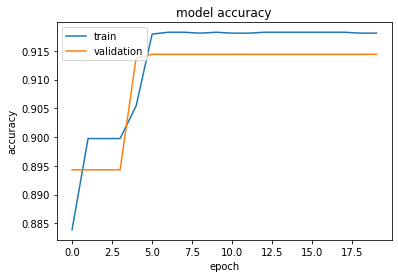

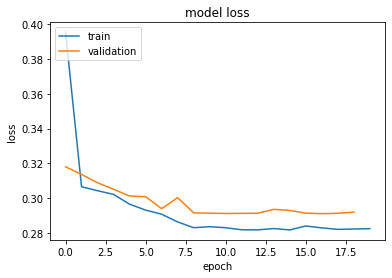

In [123]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'][1:43])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [126]:
model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape=(129,259)))
model.add(Conv1D(200, kernel_size=3, activation = 'relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(Dense(100))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_50 (LSTM)              (None, 129, 200)          368000    
                                                                 
 conv1d_52 (Conv1D)          (None, 127, 200)          120200    
                                                                 
 global_max_pooling1d (Globa  (None, 200)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_57 (Dense)            (None, 100)               20100     
                                                                 
 dense_58 (Dense)            (None, 2)                 202       
                                                                 
Total params: 508,502
Trainable params: 508,502
Non-trainable params: 0
_______________________________________________

In [127]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20
49/49 [==============================] - 13s 225ms/step - loss: 0.4204 - accuracy: 0.8624 - val_loss: 0.3469 - val_accuracy: 0.8943
Epoch 2/20
49/49 [==============================] - 11s 222ms/step - loss: 0.3243 - accuracy: 0.8997 - val_loss: 0.3456 - val_accuracy: 0.8943
Epoch 3/20
49/49 [==============================] - 11s 225ms/step - loss: 0.3190 - accuracy: 0.8997 - val_loss: 0.3527 - val_accuracy: 0.8943
Epoch 4/20
49/49 [==============================] - 12s 245ms/step - loss: 0.3137 - accuracy: 0.8997 - val_loss: 0.3390 - val_accuracy: 0.8943
Epoch 5/20
49/49 [==============================] - 12s 251ms/step - loss: 0.3069 - accuracy: 0.8999 - val_loss: 0.3368 - val_accuracy: 0.8943
Epoch 6/20
49/49 [==============================] - 12s 251ms/step - loss: 0.2983 - accuracy: 0.8997 - val_loss: 0.3269 - val_accuracy: 0.8962
Epoch 7/20
49/49 [==============================] - 12s 248ms/step - loss: 0.2945 - accuracy: 0.9033 - val_loss: 0.3376 - val_accuracy: 0.9027

In [137]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_train)
y_pred = [0 if y[0]>0.40 else 1 for y in pred]   #thereshold=50 y[0]>0.50

cm=confusion_matrix(y_train,y_pred)
print("train set")
print("0:%s - 1:%s"%(my_ec.inverse_transform([0])[0],my_ec.inverse_transform([1])[0]))
print(cm)

accuracy = (cm[0,0]+cm[1,1])/cm.sum()
precision= (cm[0,0])/(cm[0,0]+cm[1,0])
recall = (cm[0,0])/(cm[0,0]+cm[0,1])
f1=2*precision*recall/(precision+recall)

print("accuracy=%.2f f1score=%.2f"%(accuracy, f1))
print("precision=%.2f recall=%.2f"%(precision, recall))

train set
0:anomaly - 1:normal
[[ 135  483]
 [  31 5515]]
accuracy=0.92 f1score=0.34
precision=0.81 recall=0.22


In [129]:
pred

array([[0.11154404, 0.75394046],
       [0.14748341, 0.64702183],
       [0.23451436, 0.61340106],
       ...,
       [0.13610646, 0.6533523 ],
       [0.16164413, 0.7226128 ],
       [0.21547365, 0.66170824]], dtype=float32)

In [144]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, y_pred)
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_train, y_pred)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_train, y_pred)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_train, y_pred)
print(matrix)

Accuracy: 0.916613
Precision: 0.919473
Recall: 0.994410
F1 score: 0.955475
Cohens kappa: 0.315318
ROC AUC: 0.606428
[[ 135  483]
 [  31 5515]]


In [147]:
model = Sequential()
model.add(Conv1D(40, kernel_size=3, activation = 'relu', input_shape=(129,259)))
model.add(LSTM(30, return_sequences=True))
model.add(Conv1D(20, kernel_size=3, activation = 'relu'))
model.add(Dropout(rate=0.2))
model.add(LSTM(100))
model.add(Dropout(rate=0.2))
model.add(Dense(100))
model.add(Dropout(rate=0.2))
model.add(Dense(2, activation='softmax'))
model.summary()



Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_55 (Conv1D)          (None, 127, 15)           11670     
                                                                 
 lstm_53 (LSTM)              (None, 127, 30)           5520      
                                                                 
 conv1d_56 (Conv1D)          (None, 125, 70)           6370      
                                                                 
 dropout_20 (Dropout)        (None, 125, 70)           0         
                                                                 
 lstm_54 (LSTM)              (None, 100)               68400     
                                                                 
 dropout_21 (Dropout)        (None, 100)               0         
                                                                 
 dense_61 (Dense)            (None, 100)             

In [148]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20
49/49 [==============================] - 11s 173ms/step - loss: 0.4972 - accuracy: 0.8861 - val_loss: 0.3242 - val_accuracy: 0.8943
Epoch 2/20
49/49 [==============================] - 8s 159ms/step - loss: 0.3134 - accuracy: 0.8997 - val_loss: 0.3186 - val_accuracy: 0.8943
Epoch 3/20
49/49 [==============================] - 8s 162ms/step - loss: 0.3106 - accuracy: 0.8997 - val_loss: 0.3138 - val_accuracy: 0.8943
Epoch 4/20
49/49 [==============================] - 8s 164ms/step - loss: 0.3085 - accuracy: 0.8997 - val_loss: 0.3125 - val_accuracy: 0.8943
Epoch 5/20
49/49 [==============================] - 8s 161ms/step - loss: 0.3065 - accuracy: 0.8997 - val_loss: 0.3111 - val_accuracy: 0.8943
Epoch 6/20
49/49 [==============================] - 8s 163ms/step - loss: 0.3032 - accuracy: 0.8997 - val_loss: 0.3090 - val_accuracy: 0.8943
Epoch 7/20
49/49 [==============================] - 8s 164ms/step - loss: 0.3007 - accuracy: 0.9031 - val_loss: 0.3056 - val_accuracy: 0.9137
Epoch

In [149]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_train)
y_pred = [0 if y[0]>0.40 else 1 for y in pred]   #thereshold=50 y[0]>0.50

In [150]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, y_pred)
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_train, y_pred)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_train, y_pred)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_train, y_pred)
print(matrix)

Accuracy: 0.918073
Precision: 0.916680
Recall: 0.999820
F1 score: 0.956447
Cohens kappa: 0.288673
ROC AUC: 0.592143
[[ 114  504]
 [   1 5545]]


In [188]:
# two sided model
#from keras.layers.core import Input, Model
from keras.layers import *
from keras.models import *
from keras.utils import *
from keras.initializers import *
import tensorflow as tf


inputs = Input((129,259))

side1 = Bidirectional(LSTM(100, return_sequences=True))(inputs) #200 total units
side2 = Conv1D(200, kernel_size=3, activation = 'tanh', padding = 'same')(inputs) #same activation 
                                                                   #same length

merged = Add()([side1, side2]) 
     #or Concatenate()([side1, side2]) if different number of units/channels/features

outputs = Conv1D(200, kernel_size=3)(merged)
outputs = GlobalMaxPooling1D()(outputs)
outputs = Dense(100)(outputs)
outputs = Dense(2, activation='sigmoid')(outputs)

model = Model(inputs, outputs)

In [189]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 129, 259)]   0           []                               
                                                                                                  
 bidirectional_16 (Bidirectiona  (None, 129, 200)    288000      ['input_9[0][0]']                
 l)                                                                                               
                                                                                                  
 conv1d_66 (Conv1D)             (None, 129, 200)     155600      ['input_9[0][0]']                
                                                                                                  
 add_3 (Add)                    (None, 129, 200)     0           ['bidirectional_16[0][0]', 

In [158]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20
49/49 [==============================] - 15s 264ms/step - loss: 0.9201 - accuracy: 0.8340 - val_loss: 0.4203 - val_accuracy: 0.8936
Epoch 2/20
49/49 [==============================] - 11s 223ms/step - loss: 0.3384 - accuracy: 0.8967 - val_loss: 0.3699 - val_accuracy: 0.8930
Epoch 3/20
49/49 [==============================] - 11s 226ms/step - loss: 0.3277 - accuracy: 0.8986 - val_loss: 0.3618 - val_accuracy: 0.8917
Epoch 4/20
49/49 [==============================] - 11s 231ms/step - loss: 0.3250 - accuracy: 0.8978 - val_loss: 0.3618 - val_accuracy: 0.8943
Epoch 5/20
49/49 [==============================] - 11s 234ms/step - loss: 0.3204 - accuracy: 0.8991 - val_loss: 0.3504 - val_accuracy: 0.8943
Epoch 6/20
49/49 [==============================] - 12s 236ms/step - loss: 0.3126 - accuracy: 0.8999 - val_loss: 0.3565 - val_accuracy: 0.8936
Epoch 7/20
49/49 [==============================] - 12s 238ms/step - loss: 0.3106 - accuracy: 0.9007 - val_loss: 0.3500 - val_accuracy: 0.8949

In [159]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_train)
y_pred = [0 if y[0]>0.40 else 1 for y in pred]   #thereshold=50 y[0]>0.50

In [161]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, y_pred)
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_train, y_pred)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_train, y_pred)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_train, y_pred)
print(matrix)

Accuracy: 0.903958
Precision: 0.903552
Recall: 1.000000
F1 score: 0.949332
Cohens kappa: 0.073243
ROC AUC: 0.521036
[[  26  592]
 [   0 5546]]


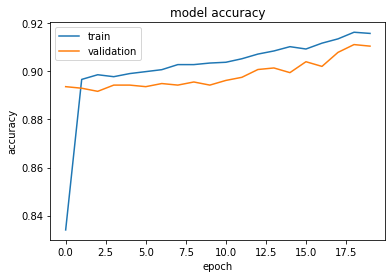

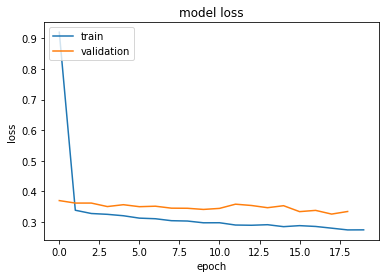

In [162]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'][1:43])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [164]:
# Get train MAE loss.
pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

ValueError: operands could not be broadcast together with shapes (6164,2) (6164,129,259) 

In [167]:
#test
pred = model.predict(X_test)
y_pred = [0 if y[0]>y[1] else 1 for y in pred]

In [168]:
#test

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Accuracy: 0.898287
Precision: 0.897059
Recall: 1.000000
F1 score: 0.945736
Cohens kappa: 0.172200
ROC AUC: 0.552511
[[  23  196]
 [   0 1708]]


In [174]:
#linear 

model = Sequential()
model.add(LSTM(20, input_shape=(129, 259)))
model.add(Conv1D(200, kernel_size=3, activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(rate=0.2))
model.add(RepeatVector(129)) 
model.add(LSTM(20, return_sequences=True))
#model.add(Dense(2, activation = "linear"))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(129))) #applies a specific layer such as Dense to every sample it receives as an input. 
model.add(LSTM(20, input_shape=(129,259)))
model.add(Conv1D(200, kernel_size=3, activation = 'relu'))
model.add(GlobalMaxPooling1D())

model.add(Dense(2, activation = "softmax"))
model.summary()

ValueError: Input 0 of layer "conv1d_63" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 20)

In [178]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy", "MeanSquaredError"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20
49/49 [==============================] - 14s 240ms/step - loss: 0.4898 - accuracy: 0.8741 - mean_squared_error: 0.3455 - val_loss: 0.3654 - val_accuracy: 0.8943 - val_mean_squared_error: 0.2883
Epoch 2/20
49/49 [==============================] - 11s 229ms/step - loss: 0.3433 - accuracy: 0.8999 - mean_squared_error: 0.2770 - val_loss: 0.3570 - val_accuracy: 0.8949 - val_mean_squared_error: 0.2553
Epoch 3/20
49/49 [==============================] - 12s 236ms/step - loss: 0.3326 - accuracy: 0.8993 - mean_squared_error: 0.2364 - val_loss: 0.3674 - val_accuracy: 0.8943 - val_mean_squared_error: 0.2532
Epoch 4/20
49/49 [==============================] - 12s 240ms/step - loss: 0.3276 - accuracy: 0.8986 - mean_squared_error: 0.2308 - val_loss: 0.3592 - val_accuracy: 0.8943 - val_mean_squared_error: 0.2381
Epoch 5/20
49/49 [==============================] - 12s 240ms/step - loss: 0.3111 - accuracy: 0.9001 - mean_squared_error: 0.2445 - val_loss: 0.3579 - val_accuracy: 0.8943 - val_me

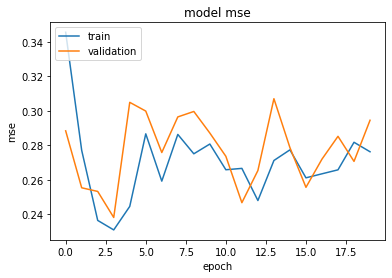

In [179]:
# summarize history for mse
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

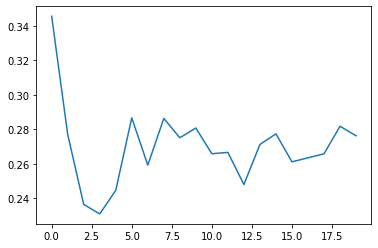

In [183]:
import matplotlib.pyplot 

plt.plot(history.history['mean_squared_error'])
plt.show()


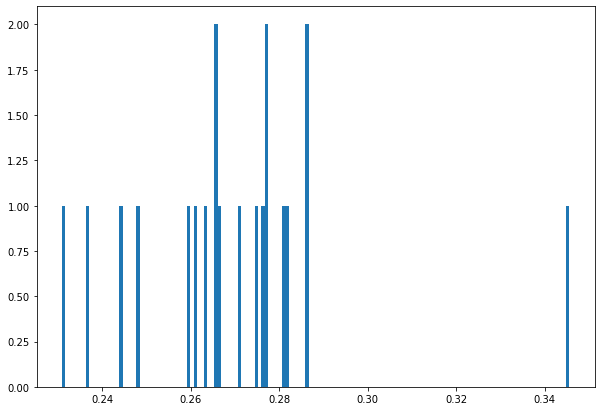

In [187]:
from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset

 
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(history.history["mean_squared_error"], bins = 150)
 
# Show plot
plt.show()

In [191]:
# two sided model
#from keras.layers.core import Input, Model
from keras.layers import *
from keras.models import *
from keras.utils import *
from keras.initializers import *
import tensorflow as tf


inputs = Input((129,259))

side1 = Bidirectional(LSTM(100, return_sequences=True))(inputs) #200 total units
side2 = Conv1D(200, kernel_size=3, activation = 'tanh', padding = 'same', kernel_regularizer='l2')(inputs) #same activation 
                                                                   #same length

merged = Add()([side1, side2]) 
     #or Concatenate()([side1, side2]) if different number of units/channels/features

outputs = Conv1D(200, kernel_size=3, kernel_regularizer='l2')(merged)
outputs = GlobalMaxPooling1D()(outputs)
outputs = Dense(100, kernel_regularizer='l2')(outputs)
outputs = Dense(2, activation='sigmoid')(outputs)

model = Model(inputs, outputs)

In [190]:
#l2 regularize

model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy", "MeanSquaredError"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20
49/49 [==============================] - 15s 248ms/step - loss: 5.9836 - accuracy: 0.8874 - mean_squared_error: 0.3821 - val_loss: 5.8181 - val_accuracy: 0.8930 - val_mean_squared_error: 0.3612
Epoch 2/20
49/49 [==============================] - 11s 234ms/step - loss: 5.7137 - accuracy: 0.8991 - mean_squared_error: 0.3685 - val_loss: 5.6711 - val_accuracy: 0.8917 - val_mean_squared_error: 0.3906
Epoch 3/20
49/49 [==============================] - 11s 233ms/step - loss: 5.5517 - accuracy: 0.9009 - mean_squared_error: 0.3881 - val_loss: 5.5121 - val_accuracy: 0.8949 - val_mean_squared_error: 0.4027
Epoch 4/20
49/49 [==============================] - 12s 240ms/step - loss: 5.3932 - accuracy: 0.9012 - mean_squared_error: 0.4254 - val_loss: 5.3695 - val_accuracy: 0.8949 - val_mean_squared_error: 0.4428
Epoch 5/20
49/49 [==============================] - 12s 249ms/step - loss: 5.2466 - accuracy: 0.9038 - mean_squared_error: 0.4446 - val_loss: 5.2163 - val_accuracy: 0.8962 - val_me

In [192]:
#test
pred = model.predict(X_test)
y_pred = [0 if y[0]>y[1] else 1 for y in pred]

In [193]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Accuracy: 0.854177
Precision: 0.886302
Recall: 0.958431
F1 score: 0.920956
Cohens kappa: -0.000654
ROC AUC: 0.499763
[[   9  210]
 [  71 1637]]


In [195]:
# Building an LSTM Model with an embedding layer #
model = Sequential()
model.add(Embedding(129, 259))  # 40 : dimension of each vector, input_length : sentence length
model.add(Dropout(0.3))
model.add(LSTM(100))  # 100 memory cells / Neurons 
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='sigmoid'))  
model.summary()

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 259)         33411     
                                                                 
 dropout_26 (Dropout)        (None, None, 259)         0         
                                                                 
 lstm_64 (LSTM)              (None, 100)               144000    
                                                                 
 dropout_27 (Dropout)        (None, 100)               0         
                                                                 
 dense_74 (Dense)            (None, 64)                6464      
                                                                 
 dropout_28 (Dropout)        (None, 64)                0         
                                                                 
 dense_75 (Dense)            (None, 2)               

In [196]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy", "MeanSquaredError"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20


ValueError: in user code:

    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_65" (type Sequential).
    
    Input 0 of layer "lstm_64" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 129, 259, 259)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 129, 259), dtype=float32)
      • training=True
      • mask=None


In [197]:
# two sided model
#from keras.layers.core import Input, Model
from keras.layers import *
from keras.models import *
from keras.utils import *
from keras.initializers import *
import tensorflow as tf


inputs = Input((129,259))

side1 = Bidirectional(LSTM(100, return_sequences=True))(inputs) #200 total units
side2 = Conv1D(200, kernel_size=3, activation = 'tanh', padding = 'same')(inputs) #same activation 
                                                                   #same length

merged = Add()([side1, side2]) 
     #or Concatenate()([side1, side2]) if different number of units/channels/features

outputs = Conv1D(200, kernel_size=3)(merged)
outputs = GlobalMaxPooling1D()(outputs)
outputs = Dense(100)(outputs)
outputs = Dense(2, activation='sigmoid')(outputs)

model = Model(inputs, outputs)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 129, 259)]   0           []                               
                                                                                                  
 bidirectional_18 (Bidirectiona  (None, 129, 200)    288000      ['input_11[0][0]']               
 l)                                                                                               
                                                                                                  
 conv1d_70 (Conv1D)             (None, 129, 200)     155600      ['input_11[0][0]']               
                                                                                                  
 add_5 (Add)                    (None, 129, 200)     0           ['bidirectional_18[0][0]', 

In [199]:
#SGD opimizers
model.compile(optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD"),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy", "MeanSquaredError"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20
49/49 [==============================] - 17s 290ms/step - loss: 0.9349 - accuracy: 0.8735 - mean_squared_error: 0.6950 - val_loss: 0.4758 - val_accuracy: 0.8943 - val_mean_squared_error: 0.6660
Epoch 2/20
49/49 [==============================] - 11s 233ms/step - loss: 0.3708 - accuracy: 0.8983 - mean_squared_error: 0.7020 - val_loss: 0.4150 - val_accuracy: 0.8943 - val_mean_squared_error: 0.7312
Epoch 3/20
49/49 [==============================] - 12s 246ms/step - loss: 0.3409 - accuracy: 0.8997 - mean_squared_error: 0.6636 - val_loss: 0.5708 - val_accuracy: 0.8379 - val_mean_squared_error: 0.6928
Epoch 4/20
49/49 [==============================] - 12s 245ms/step - loss: 0.3505 - accuracy: 0.8988 - mean_squared_error: 0.6320 - val_loss: 0.5136 - val_accuracy: 0.8878 - val_mean_squared_error: 0.6839
Epoch 5/20
49/49 [==============================] - 12s 251ms/step - loss: 0.3411 - accuracy: 0.8996 - mean_squared_error: 0.6375 - val_loss: 0.6692 - val_accuracy: 0.6167 - val_me

In [200]:
#test
pred = model.predict(X_test)
y_pred = [0 if y[0]>y[1] else 1 for y in pred]

In [201]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Accuracy: 0.886352
Precision: 0.886352
Recall: 1.000000
F1 score: 0.939752
Cohens kappa: 0.000000
ROC AUC: 0.500000
[[   0  219]
 [   0 1708]]


In [205]:
timesteps=129
num_features=259
hidden=50

model = Sequential([
        Flatten(input_shape=(timesteps, num_features)),
       # MyLayer(timesteps*num_features),
        Reshape(target_shape=(timesteps, num_features)),
        LSTM(hidden, input_shape=(timesteps, num_features)),
        RepeatVector(timesteps),
        LSTM(hidden, return_sequences=True),
        TimeDistributed(Dense(num_features)),
       # model.add(LSTM(50, input_shape=(n_features,dim3))),
        Dense(2, activation = "softmax")
    ])

In [206]:
model.summary()

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_29 (Flatten)        (None, 33411)             0         
                                                                 
 reshape_5 (Reshape)         (None, 129, 259)          0         
                                                                 
 lstm_70 (LSTM)              (None, 50)                62000     
                                                                 
 repeat_vector_18 (RepeatVec  (None, 129, 50)          0         
 tor)                                                            
                                                                 
 lstm_71 (LSTM)              (None, 129, 50)           20200     
                                                                 
 time_distributed_18 (TimeDi  (None, 129, 259)         13209     
 stributed)                                          

In [207]:
#SGD opimizers
model.compile(optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD"),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy", "MeanSquaredError"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
      app.start()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 612, in start
      self.io_loop.start()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 741, in _run_callback
      ret = callback()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2886, in run_cell
      result = self._run_cell(
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2932, in _run_cell
      return runner(coro)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3155, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3347, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3427, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-207-d5a51e03eaa1>", line 4, in <module>
      history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/losses.py", line 1862, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/backend.py", line 5202, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [16512,2] and labels shape [128]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_314308]

In [209]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(129,259)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding = 'same'))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_74 (Conv1D)          (None, 127, 64)           49792     
                                                                 
 conv1d_75 (Conv1D)          (None, 127, 64)           12352     
                                                                 
 dropout_30 (Dropout)        (None, 127, 64)           0         
                                                                 
 max_pooling1d_33 (MaxPoolin  (None, 63, 64)           0         
 g1D)                                                            
                                                                 
 flatten_31 (Flatten)        (None, 4032)              0         
                                                                 
 dense_84 (Dense)            (None, 100)               403300    
                                                     

In [210]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy", "MeanSquaredError"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20
49/49 [==============================] - 3s 58ms/step - loss: 43.6799 - accuracy: 0.8310 - mean_squared_error: 0.4994 - val_loss: 20.4518 - val_accuracy: 0.8962 - val_mean_squared_error: 0.4996
Epoch 2/20
49/49 [==============================] - 3s 55ms/step - loss: 22.1199 - accuracy: 0.8379 - mean_squared_error: 0.4987 - val_loss: 10.0470 - val_accuracy: 0.8528 - val_mean_squared_error: 0.4975
Epoch 3/20
49/49 [==============================] - 3s 55ms/step - loss: 15.2092 - accuracy: 0.8363 - mean_squared_error: 0.4980 - val_loss: 11.3367 - val_accuracy: 0.8943 - val_mean_squared_error: 0.4996
Epoch 4/20
49/49 [==============================] - 3s 55ms/step - loss: 12.0510 - accuracy: 0.8409 - mean_squared_error: 0.4981 - val_loss: 6.7199 - val_accuracy: 0.7983 - val_mean_squared_error: 0.4941
Epoch 5/20
49/49 [==============================] - 3s 58ms/step - loss: 9.1956 - accuracy: 0.8405 - mean_squared_error: 0.4973 - val_loss: 6.3091 - val_accuracy: 0.8703 - val_mean_

In [211]:
#test
pred = model.predict(X_test)
y_pred = [0 if y[0]>.40 else 1 for y in pred]

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Accuracy: 0.864037
Precision: 0.903911
Recall: 0.947307
F1 score: 0.925100
Cohens kappa: 0.193500
ROC AUC: 0.580959
[[  47  172]
 [  90 1618]]


In [214]:
model = Sequential()
model.add(Conv1D(40, kernel_size=3, activation = 'relu', input_shape=(129,259)))
model.add(LSTM(30, return_sequences=True))
model.add(Conv1D(20, kernel_size=3, activation = 'relu'))
model.add(Dropout(rate=0.2))
model.add(LSTM(100))
model.add(Dropout(rate=0.2))
model.add(Dense(100))
model.add(Dropout(rate=0.2))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_77 (Conv1D)          (None, 127, 40)           31120     
                                                                 
 lstm_73 (LSTM)              (None, 127, 30)           8520      
                                                                 
 conv1d_78 (Conv1D)          (None, 125, 20)           1820      
                                                                 
 dropout_31 (Dropout)        (None, 125, 20)           0         
                                                                 
 lstm_74 (LSTM)              (None, 100)               48400     
                                                                 
 dropout_32 (Dropout)        (None, 100)               0         
                                                                 
 dense_87 (Dense)            (None, 100)             

In [215]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy", "MeanSquaredError"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20
49/49 [==============================] - 10s 165ms/step - loss: 0.4945 - accuracy: 0.8994 - mean_squared_error: 0.3015 - val_loss: 0.3230 - val_accuracy: 0.8943 - val_mean_squared_error: 0.4397
Epoch 2/20
49/49 [==============================] - 7s 152ms/step - loss: 0.3080 - accuracy: 0.8997 - mean_squared_error: 0.4205 - val_loss: 0.3144 - val_accuracy: 0.8943 - val_mean_squared_error: 0.4115
Epoch 3/20
49/49 [==============================] - 8s 153ms/step - loss: 0.3066 - accuracy: 0.8997 - mean_squared_error: 0.4140 - val_loss: 0.3134 - val_accuracy: 0.8943 - val_mean_squared_error: 0.4140
Epoch 4/20
49/49 [==============================] - 7s 153ms/step - loss: 0.3073 - accuracy: 0.8997 - mean_squared_error: 0.4128 - val_loss: 0.3149 - val_accuracy: 0.8943 - val_mean_squared_error: 0.4296
Epoch 5/20
49/49 [==============================] - 7s 153ms/step - loss: 0.3060 - accuracy: 0.8997 - mean_squared_error: 0.4195 - val_loss: 0.3120 - val_accuracy: 0.8943 - val_mean_s

In [216]:
#test
pred = model.predict(X_test)
y_pred = [0 if y[0]>.40 else 1 for y in pred]

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Accuracy: 0.908147
Precision: 0.906101
Recall: 1.000000
F1 score: 0.950738
Cohens kappa: 0.296093
ROC AUC: 0.595890
[[  42  177]
 [   0 1708]]


In [222]:
model = Sequential()
model.add(Conv1D(128, kernel_size=3, activation = 'relu', input_shape=(129,259)))
model.add(LSTM(128, return_sequences=True))
model.add(TimeDistributed(Dense(2, activation='softmax')))
model.summary()

Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_81 (Conv1D)          (None, 127, 128)          99584     
                                                                 
 lstm_77 (LSTM)              (None, 127, 128)          131584    
                                                                 
 time_distributed_20 (TimeDi  (None, 127, 2)           258       
 stributed)                                                      
                                                                 
Total params: 231,426
Trainable params: 231,426
Non-trainable params: 0
_________________________________________________________________


In [223]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy", "MeanSquaredError"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'SquaredDifference' defined at (most recent call last):
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
      app.start()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 612, in start
      self.io_loop.start()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 741, in _run_callback
      ret = callback()
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2886, in run_cell
      result = self._run_cell(
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2932, in _run_cell
      return runner(coro)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3155, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3347, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3427, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-223-f665dc03078c>", line 2, in <module>
      history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 864, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 957, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 459, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/utils/metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/metrics.py", line 178, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/metrics.py", line 729, in update_state
      matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/losses.py", line 1329, in mean_squared_error
      return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)
Node: 'SquaredDifference'
Incompatible shapes: [128] vs. [128,127,2]
	 [[{{node SquaredDifference}}]] [Op:__inference_train_function_354835]

In [227]:
model = Sequential()
model.add(ConvLSTM1D(filters=64, kernel_size=(1), input_shape=(129, 259)))
model.add(Flatten())
model.add(Dense(2))

ValueError: Input 0 of layer "conv_lstm1d_6" is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: (None, 129, 259)

In [228]:
# two sided model
#from keras.layers.core import Input, Model
from keras.layers import *
from keras.models import *
from keras.utils import *
from keras.initializers import *
import tensorflow as tf


inputs = Input((129,259))

side1 = Bidirectional(LSTM(100, return_sequences=True))(inputs) #200 total units
side2 = Conv1D(200, kernel_size=3, activation = 'relu', padding = 'same')(inputs) #same activation 
                                                                   #same length

merged = Add()([side1, side2]) 
     #or Concatenate()([side1, side2]) if different number of units/channels/features

outputs = Conv1D(200, kernel_size=3)(merged)
outputs = GlobalMaxPooling1D()(outputs)
outputs = Dense(100)(outputs)
outputs = Dense(2, activation='softmax')(outputs)

model = Model(inputs, outputs)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 129, 259)]   0           []                               
                                                                                                  
 bidirectional_21 (Bidirectiona  (None, 129, 200)    288000      ['input_13[0][0]']               
 l)                                                                                               
                                                                                                  
 conv1d_82 (Conv1D)             (None, 129, 200)     155600      ['input_13[0][0]']               
                                                                                                  
 add_6 (Add)                    (None, 129, 200)     0           ['bidirectional_21[0][0]', 

In [229]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy", "MeanSquaredError"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20
49/49 [==============================] - 15s 248ms/step - loss: 141.3748 - accuracy: 0.8277 - mean_squared_error: 0.4997 - val_loss: 71.9901 - val_accuracy: 0.8820 - val_mean_squared_error: 0.4999
Epoch 2/20
49/49 [==============================] - 12s 247ms/step - loss: 50.2744 - accuracy: 0.8488 - mean_squared_error: 0.4994 - val_loss: 55.7242 - val_accuracy: 0.7815 - val_mean_squared_error: 0.4989
Epoch 3/20
49/49 [==============================] - 12s 248ms/step - loss: 39.3156 - accuracy: 0.8467 - mean_squared_error: 0.4991 - val_loss: 50.9765 - val_accuracy: 0.8230 - val_mean_squared_error: 0.4998
Epoch 4/20
49/49 [==============================] - 12s 238ms/step - loss: 38.3435 - accuracy: 0.8512 - mean_squared_error: 0.4993 - val_loss: 80.8637 - val_accuracy: 0.8949 - val_mean_squared_error: 0.5000
Epoch 5/20
49/49 [==============================] - 12s 238ms/step - loss: 34.3950 - accuracy: 0.8584 - mean_squared_error: 0.4995 - val_loss: 48.1032 - val_accuracy: 0.77

In [230]:
# Model A
a_ip_img = Input(shape=(129, 259, name="Input_a")
al_1 = Dense(64, activation = "relu",name ="a_layer_1")(a_ip_img)
al_2 = Dense(128, activation="relu",name ="a_layer_2")(al_1)
al_3 = Dense(64, activation="relu",name ="a_layer_3")(al_2)
al_4 = Dense(32, activation="sigmoid",name ="a_output_layer")(al_3)

#Model B
b_ip_img = Input(shape=(32,32,1), name="Input_b")
bl_1 = Dense(64, activation="relu",name ="b_layer_1")(b_ip_img)
bl_2 = Dense(32, activation = "sigmoid",name ="b_output_layer")(bl_1)

#Merging model A and B
a_b = concatenate([al_4,bl_2],name="concatenated_layer")

#Final Layer
output_layer = Dense(2, activation = "sigmoid", name = "output_layer")(a_b)

#Model Definition 
merged = Model(inputs=[(a_ip_img,b_ip_img)],outputs=[output_layer], name = "merged model")

#Model Details
merged.summary()

SyntaxError: invalid syntax (<ipython-input-230-8a9da4cd0bce>, line 2)

In [233]:
#merged
model1 = Sequential()
#input 
model1.add(Dense(32, input_shape=(129, 259)))
model1.add(Activation("elu"))
model1.add(Dropout(0.5))
model1.add(Dense(16))
model1.add(Activation("elu"))
model1.add(Dropout(0.25))
model1.add(Flatten())

model2 = Sequential()
#input 
model2.add(Dense(32, input_shape=(129, 259)))
model2.add(Activation("elu"))
model2.add(Dropout(0.5))
model2.add(Dense(16))
model2.add(Activation("elu"))
model2.add(Dropout(0.25))
model2.add(Flatten())

merged = Concatenate()([model1.output,model2.output])
z = Dense(128, activation="relu")(merged)
z = Dropout(0.25)(z)
z = Dense(100, activation="relu")(z)
z = Dense(2, activation="sigmoid")(z)

model = Model(inputs=[model1.input, model2.input], outputs=z)

In [234]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 dense_100_input (InputLayer)   [(None, 129, 259)]   0           []                               
                                                                                                  
 dense_102_input (InputLayer)   [(None, 129, 259)]   0           []                               
                                                                                                  
 dense_100 (Dense)              (None, 129, 32)      8320        ['dense_100_input[0][0]']        
                                                                                                  
 dense_102 (Dense)              (None, 129, 32)      8320        ['dense_102_input[0][0]']        
                                                                                            

In [235]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy", "MeanSquaredError"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20


ValueError: in user code:

    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/keras/engine/input_spec.py", line 200, in assert_input_compatibility
        raise ValueError(f'Layer "{layer_name}" expects {len(input_spec)} input(s),'

    ValueError: Layer "model_7" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 129, 259) dtype=float32>]


In [237]:
pip install scikeras


     |████████████████████████████████| 8.6 MB 2.2 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


In [239]:
from scikeras.wrappers import KerasClassifier


ImportError: cannot import name 'available_if' from 'sklearn.utils.metaestimators' (/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/metaestimators.py)

In [240]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

model = KerasClassifier(model=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)


ImportError: cannot import name 'available_if' from 'sklearn.utils.metaestimators' (/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/metaestimators.py)

In [255]:
# two sided model
#from keras.layers.core import Input, Model
from keras.layers import *
from keras.models import *
from keras.utils import *
from keras.initializers import *
import tensorflow as tf


inputs = Input((129,259))

side1 = Bidirectional(LSTM(100, return_sequences=True))(inputs) #200 total units
side2 = Conv1D(200, kernel_size=3, activation = 'relu', padding = 'same')(inputs) #same activation 
                                                                   #same length

merged = Add()([side1, side2]) 
     #or Concatenate()([side1, side2]) if different number of units/channels/features

outputs = Conv1D(100, kernel_size=3)(merged)
outputs = GlobalMaxPooling1D()(outputs)
outputs = Dense(100)(outputs)
outputs = Dense(2, activation='softmax')(outputs)

model = Model(inputs, outputs)
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_28 (InputLayer)          [(None, 129, 259)]   0           []                               
                                                                                                  
 bidirectional_33 (Bidirectiona  (None, 129, 200)    288000      ['input_28[0][0]']               
 l)                                                                                               
                                                                                                  
 conv1d_103 (Conv1D)            (None, 129, 200)     155600      ['input_28[0][0]']               
                                                                                                  
 add_21 (Add)                   (None, 129, 200)     0           ['bidirectional_33[0][0]',

In [256]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy", "MeanSquaredError"])
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation),epochs = 20, batch_size = 128, verbose = 1)


Epoch 1/20
49/49 [==============================] - 16s 277ms/step - loss: 92.1628 - accuracy: 0.8290 - mean_squared_error: 0.4998 - val_loss: 47.9626 - val_accuracy: 0.7983 - val_mean_squared_error: 0.4995
Epoch 2/20
49/49 [==============================] - 11s 225ms/step - loss: 42.7177 - accuracy: 0.8318 - mean_squared_error: 0.4994 - val_loss: 36.7084 - val_accuracy: 0.8178 - val_mean_squared_error: 0.4994
Epoch 3/20
49/49 [==============================] - 11s 223ms/step - loss: 33.8463 - accuracy: 0.8383 - mean_squared_error: 0.4992 - val_loss: 57.8554 - val_accuracy: 0.6206 - val_mean_squared_error: 0.4984
Epoch 4/20
49/49 [==============================] - 12s 250ms/step - loss: 31.1950 - accuracy: 0.8386 - mean_squared_error: 0.4992 - val_loss: 30.8109 - val_accuracy: 0.8061 - val_mean_squared_error: 0.4988
Epoch 5/20
49/49 [==============================] - 12s 244ms/step - loss: 27.3279 - accuracy: 0.8438 - mean_squared_error: 0.4990 - val_loss: 29.7786 - val_accuracy: 0.858

In [257]:
#test
pred = model.predict(X_test)
y_pred = [0 if y[0]>.40 else 1 for y in pred]

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Accuracy: 0.744681
Precision: 0.891753
Recall: 0.810304
F1 score: 0.849080
Cohens kappa: 0.032950
ROC AUC: 0.521591
[[  51  168]
 [ 324 1384]]


In [259]:
# two sided model
#from keras.layers.core import Input, Model
from keras.layers import *
from keras.models import *
from keras.utils import *
from keras.initializers import *
import tensorflow as tf


inputs = Input((129,259))

side1 = Bidirectional(LSTM(100, return_sequences=True))(inputs) #200 total units
side2 = Conv1D(200, kernel_size=3, activation = 'relu', padding = 'same')(inputs) #same activation 
                                                                   #same length

merged = Add()([side1, side2]) 
     #or Concatenate()([side1, side2]) if different number of units/channels/features

outputs = Conv1D(100, kernel_size=3)(merged)
outputs = GlobalMaxPooling1D()(outputs)
outputs = Dense(100)(outputs)
outputs = Dense(2, activation='softmax')(outputs)

model = Model(inputs, outputs)
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_30 (InputLayer)          [(None, 129, 259)]   0           []                               
                                                                                                  
 bidirectional_35 (Bidirectiona  (None, 129, 200)    288000      ['input_30[0][0]']               
 l)                                                                                               
                                                                                                  
 conv1d_107 (Conv1D)            (None, 129, 200)     155600      ['input_30[0][0]']               
                                                                                                  
 add_23 (Add)                   (None, 129, 200)     0           ['bidirectional_35[0][0]',